Accuracy: 71.28%
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      2061
           1       0.86      0.35      0.49      1397

    accuracy                           0.71      3458
   macro avg       0.77      0.65      0.65      3458
weighted avg       0.75      0.71      0.68      3458



(0.0, 4.980000000000006)

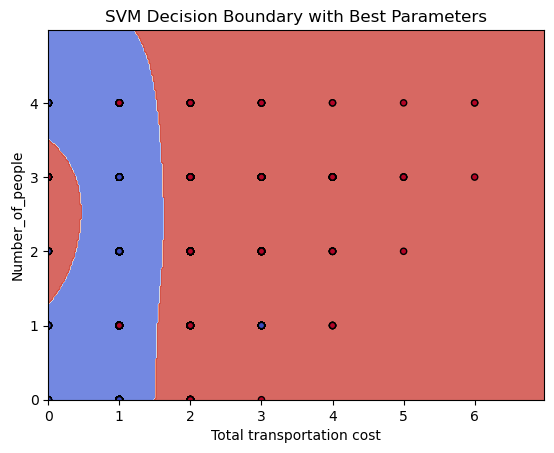

In [1]:
import pickle
                      
import joblib
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

loaded_model = joblib.load('svm_model.pkl')
loaded_model


filename = '전처리완료그래프.csv'

df = pd.read_csv(filename, encoding='cp949')
df=df.dropna()


def convert_number_of_people(value):
    if value in [3, 4, 5, 6, 7, 8, 9]:
        return 3
    elif value >= 10:
        return 4
    else:
        return value

df['Number_of_people'] =df['Number_of_people'].apply(convert_number_of_people)

df = df.drop('SPOT', axis = 1)
df = df.drop('SEX', axis = 1)
df = df.drop('AGE', axis = 1)
df = df.drop('Total accommodation fee', axis = 1)
#df = df.drop('Total transportation cost', axis = 1)

# 데이터 분할
Y_data = df['Accommodation']
X_data = df.drop('Accommodation', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)



predictions =loaded_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')

print(classification_report(Y_test, predictions))

with open('xx.pkl', 'rb') as f:
    xx = pickle.load(f)

with open('yy.pkl', 'rb') as f:
    yy = pickle.load(f)

with open('Z.pkl', 'rb') as f:
    Z = pickle.load(f)
    
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Total transportation cost')
plt.ylabel('Number_of_people')
plt.title('SVM Decision Boundary with Best Parameters')
plt.xlim(left=0)
plt.ylim(bottom=0)


